## Datos
Conjunto de datos tomados de http://www.laurencemoroney.com/rock-paper-scissors-dataset/

In [8]:
# Descargo los datos de entrenamiento
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&confirm=t' -O rps.zip
# Descargo los datos para pruebas
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pv7Be32Bk3IO43BCcG7O95DYUKmzumuz&confirm=t' -O rps-test.zip

--2025-03-05 21:30:07--  https://docs.google.com/uc?export=download&id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&confirm=t
Resolving docs.google.com (docs.google.com)... 142.250.78.46, 2800:3f0:4005:403::200e
Connecting to docs.google.com (docs.google.com)|142.250.78.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&export=download [following]
--2025-03-05 21:30:07--  https://drive.usercontent.google.com/download?id=1umVTyVJ1C0j3nPGQYSfSegLixqgCS95u&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.78.65, 2800:3f0:4005:40a::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.78.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2419 (2.4K) [text/html]
Saving to: ‘rps.zip’

rps.zip             100%[===================>]   2.36K  --.-KB/s    in 0s      

2025-03-05 21:30:0

In [1]:
# Descomprimir los datos
!unzip "rps.zip"
!unzip "rps-test-set.zip"

Archive:  rps.zip
   creating: rps/paper/
  inflating: rps/paper/paper01-000.png  
  inflating: rps/paper/paper01-001.png  
  inflating: rps/paper/paper01-002.png  
  inflating: rps/paper/paper01-003.png  
  inflating: rps/paper/paper01-004.png  
  inflating: rps/paper/paper01-005.png  
  inflating: rps/paper/paper01-006.png  
  inflating: rps/paper/paper01-007.png  
  inflating: rps/paper/paper01-008.png  
  inflating: rps/paper/paper01-009.png  
  inflating: rps/paper/paper01-010.png  
  inflating: rps/paper/paper01-011.png  
  inflating: rps/paper/paper01-012.png  
  inflating: rps/paper/paper01-013.png  
  inflating: rps/paper/paper01-014.png  
  inflating: rps/paper/paper01-015.png  
  inflating: rps/paper/paper01-016.png  
  inflating: rps/paper/paper01-017.png  
  inflating: rps/paper/paper01-018.png  
  inflating: rps/paper/paper01-019.png  
  inflating: rps/paper/paper01-020.png  
  inflating: rps/paper/paper01-021.png  
  inflating: rps/paper/paper01-022.png  
  inflating: rp

In [1]:
import os

# Rutas a las carpetas
dir_papel = os.path.join('./rps/paper')
dir_piedra = os.path.join('./rps/rock')
dir_tijera = os.path.join('./rps/scissors')
# Archivos en las carpetas
archivos_papel = os.listdir(dir_papel)
archivos_piedra = os.listdir(dir_piedra)
archivos_tijera = os.listdir(dir_tijera)

print('Total de imagenes para entrenar (papel):', len(archivos_papel))
print('Total de imagenes para entrenar (piedra):', len(archivos_piedra))
print('Total de imagenes para entrenar (tijera):', len(archivos_tijera))

Total de imagenes para entrenar (papel): 840
Total de imagenes para entrenar (piedra): 840
Total de imagenes para entrenar (tijera): 840


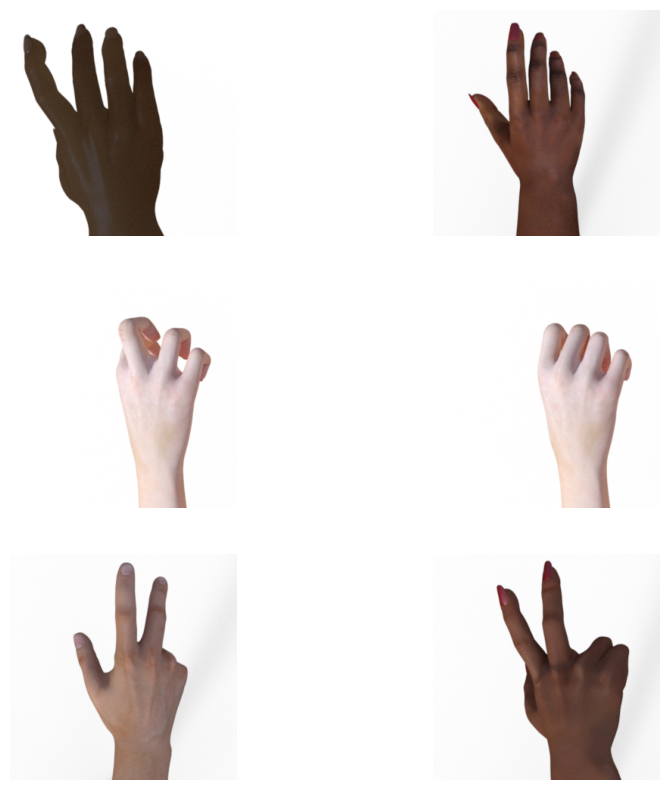

In [2]:
# Visualizar algunos ejemplos
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

indice = 2
prox_papel = [os.path.join(dir_papel, fname) 
                for fname in archivos_papel[:indice]]
prox_piedra = [os.path.join(dir_piedra, fname) 
                for fname in archivos_piedra[:indice]]
prox_tijera = [os.path.join(dir_tijera, fname) 
                for fname in archivos_tijera[:indice]]

plt.figure(figsize=(10, 10))
for i, imagen in enumerate(prox_papel + prox_piedra + prox_tijera):
  img = mpimg.imread(imagen)
  plt.subplot(3, 2, i+1)
  plt.imshow(img)
  plt.axis('Off')

## Modelo 1 - Red neuronal tradicional

In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

dir_train = './rps/'
datagen_train = ImageDataGenerator(rescale=1./255)

dir_val = './rps-test-set/'
datagen_val = ImageDataGenerator(rescale=1./255)

gen_train = datagen_train.flow_from_directory(
    dir_train, target_size=(150, 150), class_mode='categorical'
)
gen_val = datagen_val.flow_from_directory(
    dir_val, target_size=(150, 150), class_mode='categorical'
)

2025-03-06 15:10:31.812026: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-06 15:10:31.812552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 15:10:31.814376: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 15:10:31.819258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741291831.828642   95301 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741291831.83

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [5]:
modelo1 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo1.summary()

modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/jlondono/Documents/EAFIT/AppliedML-Course/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1741292089.039285   95301 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,562,051 (131.84 MB)

 Trainable params: 34,562,051 (131.84 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Entrenamiento
historia1 = modelo1.fit(gen_train, epochs=15, validation_data=gen_val, batch_size = 32, verbose=1)
# Guardo el modelo
modelo1.save("modelo1.h5")

Epoch 1/15


/home/jlondono/Documents/EAFIT/AppliedML-Course/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4394 - loss: 42.2514 - val_accuracy: 0.3522 - val_loss: 2.6772
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.6830 - loss: 1.6484 - val_accuracy: 0.4892 - val_loss: 4.6295
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.8203 - loss: 0.9624 - val_accuracy: 0.5134 - val_loss: 14.5245
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.7903 - loss: 1.7887 - val_accuracy: 0.5108 - val_loss: 3.8921
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9258 - loss: 0.2097 - val_accuracy: 0.5403 - val_loss: 3.9740
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9551 - loss: 0.1732 - val_accuracy: 0.3978 - val_loss: 5.8253
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.7859 - loss: 1.5827 - val_accuracy: 0.5860 - val_loss: 4.1248
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.9769 - loss: 0.0693 - val_accuracy: 0.5645

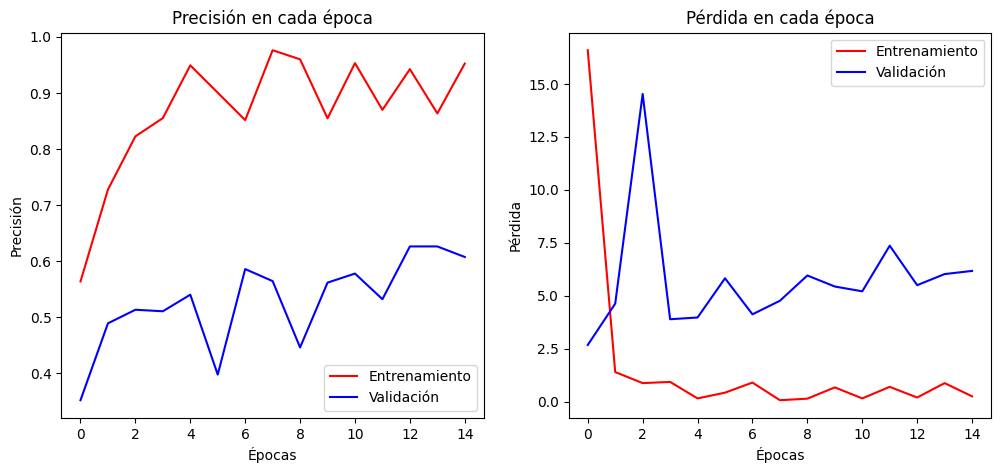

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epocas = range(len(acc))

    # Gráfica de Precisión
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera gráfica
    plt.plot(epocas, acc, 'r', label='Entrenamiento')
    plt.plot(epocas, val_acc, 'b', label='Validación')
    plt.title('Precisión en cada época')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend(loc='lower right')

    # Gráfica de Pérdida
    plt.subplot(1, 2, 2)  # Segunda gráfica
    plt.plot(epocas, loss, 'r', label='Entrenamiento')
    plt.plot(epocas, val_loss, 'b', label='Validación')
    plt.title('Pérdida en cada época')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend(loc='upper right')

    plt.show()
  
plot_history(historia1)

In [8]:
modelo1_2 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo1.summary()

modelo1_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,686,155 (395.53 MB)

 Trainable params: 34,562,051 (131.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,124,104 (263.69 MB)

## Modelo 2 - Convoluciones

In [14]:
modelo2 = tf.keras.models.Sequential([
    # El tamaño esperado es 150x150 con 3 bytes de color
    # La primera convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolución
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolución
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La matriz de entrada la aplano para la red densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuronas en la capa interna
    tf.keras.layers.Dense(512, activation='relu'),
    # Probabilidad de pertenencia a cada una de las 3 clases
    tf.keras.layers.Dense(3, activation='softmax')
])

modelo2.summary()
modelo2.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/jlondono/Documents/EAFIT/AppliedML-Course/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
historia2 = modelo2.fit(gen_train, epochs=15, batch_size = 32, validation_data=gen_val, verbose = 1)

modelo2.save("modelo2.h5")

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.5183 - loss: 0.9021 - val_accuracy: 0.8925 - val_loss: 0.2619
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - accuracy: 0.9815 - loss: 0.0904 - val_accuracy: 0.9247 - val_loss: 0.1945
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 234ms/step - accuracy: 0.9938 - loss: 0.0228 - val_accuracy: 0.9462 - val_loss: 0.1119
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.9974 - loss: 0.0117 - val_accuracy: 0.9355 - val_loss: 0.1532
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step - accuracy: 0.9976 - loss: 0.0066 - val_accuracy: 0.8978 - val_loss: 0.3143
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 224ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9247 - val_loss: 0.1762
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 1.0000 - loss: 3.3325e-04 - val_accuracy: 0.8790 - val_loss: 0.4193
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.9996 - loss: 0.0016 - val_

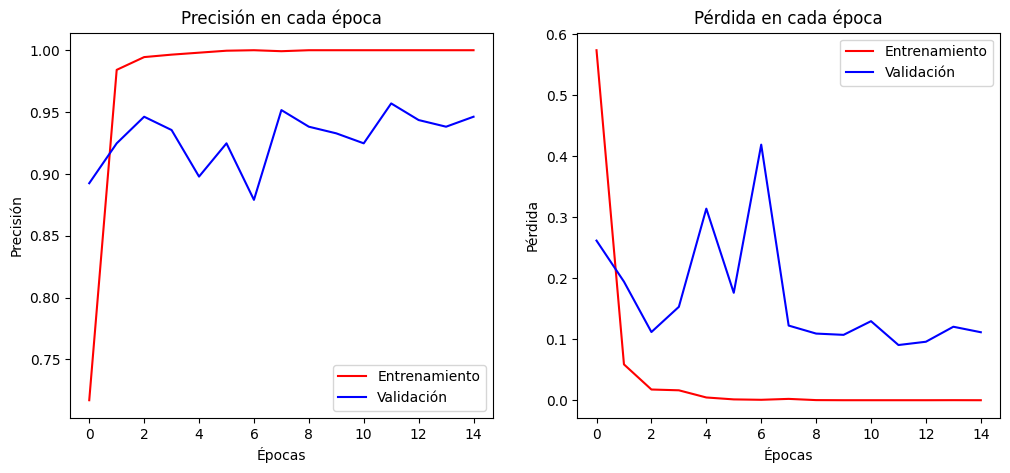

In [16]:
plot_history(historia2)

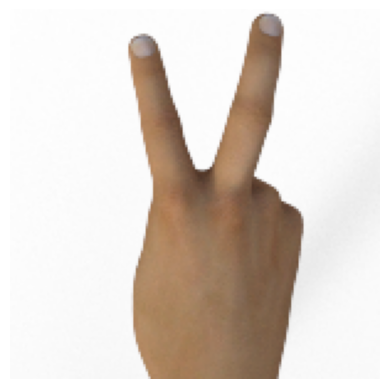

In [17]:
import numpy as np

# Obtener un batch de imágenes desde el generador de validación
imagenes, etiquetas = next(gen_val)  # `next()` obtiene el siguiente batch

# Seleccionar una imagen del batch (la primera en este caso)
imagen_a_predecir = imagenes[0]  # Tomamos la primera imagen
etiqueta_real = np.argmax(etiquetas[0])  # Obtener la clase real

# Mostrar la imagen
plt.imshow(imagen_a_predecir)
plt.axis("off")
plt.show()


In [18]:
# Expandimos la dimensión para que tenga el formato (1, 150, 150, 3)
imagen_a_predecir = np.expand_dims(imagen_a_predecir, axis=0)

# Hacer la predicción
prediccion = modelo2.predict(imagen_a_predecir)

# Ver las probabilidades para cada clase
print("Predicciones:", prediccion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicciones: [[1.6869251e-07 1.3953664e-14 9.9999988e-01]]


In [19]:
# Obtener la clase con mayor probabilidad
clase_predicha = np.argmax(prediccion)
print("Clase predicha:", clase_predicha)


Clase predicha: 2


In [20]:
clases = list(gen_train.class_indices.keys())  # Obtener los nombres de las clases
print("La imagen es un:", clases[clase_predicha])
print("La etiqueta real era:", clases[etiqueta_real])

La imagen es un: scissors
La etiqueta real era: scissors
